In [23]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from pickle import dump, load
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/naive-bayes-project-tutorial/main/playstore_reviews.csv')
data.head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [25]:
data['polarity'].value_counts()

polarity
0    584
1    307
Name: count, dtype: int64

In [26]:
data[data['polarity'] == 0].head()

,package_name,review,polarity
0,com.facebook.katana,privacy at least put some option appear offli...,0
1,com.facebook.katana,"messenger issues ever since the last update, ...",0
2,com.facebook.katana,profile any time my wife or anybody has more ...,0
3,com.facebook.katana,the new features suck for those of us who don...,0
4,com.facebook.katana,forced reload on uploading pic on replying co...,0


In [27]:
data[data['polarity'] == 1].head()

,package_name,review,polarity
73,com.twitter.android,love it you are able to see celebrity tweets ...,1
105,com.linkedin.android,it is fine.. and getting better.. working qui...,1
113,com.linkedin.android,groups??? ** edit: i changed my rating from o...,1
125,com.king.candycrushsaga,memory game the levels are so hard and less m...,1
128,com.king.candycrushsaga,"umm.... while this game has gotten kinda old,...",1


In [28]:
data.iloc[885]['review']

" too many ads far more adverts than any other game i've played. i know it's free and they need the ads to make a profit but there needs to be a balance."

In [29]:
data = data.drop('package_name', axis=1)

In [30]:
# Making lowercase and removing leading and trailing spaces

data['review'] = data['review'].str.strip().str.lower()

In [31]:
# Splitting dataset

X = data['review']
y = data['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# CountVectorizer

vec_model = CountVectorizer(stop_words = 'english')
X_train = vec_model.fit_transform(X_train).toarray()
X_test = vec_model.transform(X_test).toarray()

In [33]:
# Multinomial model

model_m = MultinomialNB()
model_m.fit(X_train, y_train)

y_pred = model_m.predict(X_test)

eval_metrics = {'Accuracy':accuracy_score, 'Precision':precision_score, 'Recall':recall_score, 'F1':f1_score}

for k, v in eval_metrics.items():
    print(f'{k}: {v(y_test, y_pred)}')

Accuracy: 0.8156424581005587
Precision: 0.7272727272727273
Recall: 0.6037735849056604
F1: 0.6597938144329897


In [34]:
# Bernoulli model for comparison

model_b = BernoulliNB()
model_b.fit(X_train, y_train)

y_pred = model_b.predict(X_test)

for k, v in eval_metrics.items():
    print(f'{k}: {v(y_test, y_pred)}')

Accuracy: 0.770949720670391
Precision: 0.7
Recall: 0.39622641509433965
F1: 0.5060240963855421


In [35]:
# Gaussian model for comparison

model_g = GaussianNB()
model_g.fit(X_train, y_train)

y_pred = model_g.predict(X_test)

for k, v in eval_metrics.items():
    print(f'{k}: {v(y_test, y_pred)}')

Accuracy: 0.8044692737430168
Precision: 0.6875
Recall: 0.6226415094339622
F1: 0.6534653465346535


In [36]:
# Finding optimized parameters for Multinomial model

params = {
    'alpha': np.linspace(0.001, 10.0, 200),
    'fit_prior': [True, False]
}

grid = GridSearchCV(model_m, param_grid=params, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

best_params = grid.best_params_

best_params

{'alpha': np.float64(1.860110552763819), 'fit_prior': False}

In [37]:
# Multinomial with optimized hyperparameters

opt_model_m = MultinomialNB(**best_params) 
opt_model_m.fit(X_train, y_train)

y_pred = opt_model_m.predict(X_test)

for k, v in eval_metrics.items():
    print(f'{k}: {v(y_test, y_pred)}')

Accuracy: 0.8212290502793296
Precision: 0.723404255319149
Recall: 0.6415094339622641
F1: 0.68


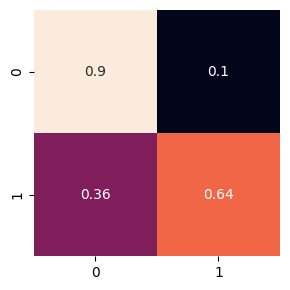

In [38]:
# Confusion matrix

cm_rev = confusion_matrix(y_test, y_pred, normalize='true')
cm_rev = pd.DataFrame(cm_rev)

plt.figure(figsize=(3,3))

sns.heatmap(cm_rev, annot=True, cbar=False)

plt.tight_layout()
plt.show()

In [39]:
# Saving Multinomial model

dump(opt_model_m, open('multinomial_classifier_reviews.sav', 'wb'))